Importing the dependencies

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Preprocessing

In [2]:
# loading the data file from csv file to pandas dataframe

car_dataset = pd.read_csv('d:\qtree projeccts\csv and excel files\machine learning project\car data.csv')

<>:3: SyntaxWarning: invalid escape sequence '\q'
<>:3: SyntaxWarning: invalid escape sequence '\q'
C:\Users\ANAND\AppData\Local\Temp\ipykernel_5052\504941889.py:3: SyntaxWarning: invalid escape sequence '\q'
  car_dataset = pd.read_csv('d:\qtree projeccts\csv and excel files\machine learning project\car data.csv')


In [3]:
# inspecting the first 5 rows of the dataset
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# checking the number of columns and rows

car_dataset.shape

(301, 9)

In [5]:
# get some information about our dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# checking the number of missing values our dataset
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# checking the distributionn of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding the Categorical data

In [8]:
# encoding "Fuel_Type" column 
car_dataset.replace({"Fuel_Type":{'Petrol':0,'Diesel':1,'CNG':2}}, inplace=True)

# encoding "Seller_Type" column 
car_dataset.replace({"Seller_Type":{'Dealer':0,'Individual':1}}, inplace=True)

# encoding "Transmission" column 
car_dataset.replace({"Transmission":{'Manual':0,'Automatic':1}}, inplace=True)

C:\Users\ANAND\AppData\Local\Temp\ipykernel_5052\1441822051.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({"Fuel_Type":{'Petrol':0,'Diesel':1,'CNG':2}}, inplace=True)
C:\Users\ANAND\AppData\Local\Temp\ipykernel_5052\1441822051.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({"Seller_Type":{'Dealer':0,'Individual':1}}, inplace=True)
C:\Users\ANAND\AppData\Local\Temp\ipykernel_5052\1441822051.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in 

In [9]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data and target

In [10]:
x = car_dataset.drop(['Car_Name','Selling_Price'], axis=1)
y = car_dataset['Selling_Price']

In [11]:
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [12]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

Splitting Training and Test data

In [13]:
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.1, random_state=2)

Model Training

1. LinearRegressinon model

In [14]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [15]:
lin_reg_model.fit(x_train, y_train)

LinearRegression()

Model Evaluation 

In [16]:
# prediction of training data
training_data_prediction = lin_reg_model.predict(x_train)

In [17]:
# R squared error

error_score = metrics.r2_score(y_train,training_data_prediction)
print("R-Squared error: ", error_score)


R-Squared error:  0.8799451660493708


Visualizing the actual prices and predicted prices

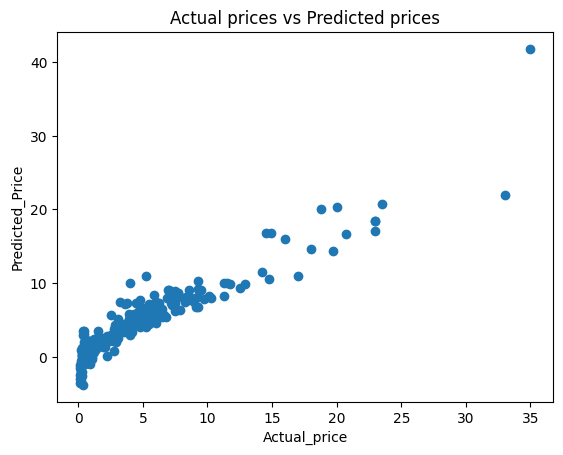

In [18]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual_price")
plt.ylabel("Predicted_Price")
plt.title("Actual prices vs Predicted prices")
plt.show()

In [19]:
# prediction of test data
test_data_prediction = lin_reg_model.predict(x_test)

In [20]:
# R squared error

error_score = metrics.r2_score(y_test,test_data_prediction)
print("R-Squared error: ", error_score)


R-Squared error:  0.8365766715026374


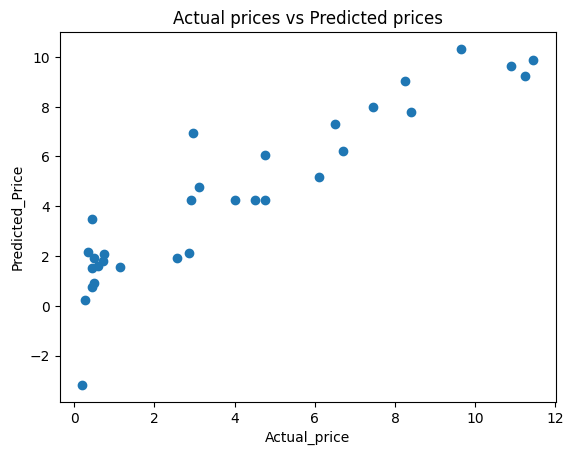

In [21]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual_price")
plt.ylabel("Predicted_Price")
plt.title("Actual prices vs Predicted prices")
plt.show()

2. Lasso Regression

In [22]:
# loading the linear regression model
lass_reg_model = Lasso()

In [23]:
lass_reg_model.fit(x_train, y_train)

Lasso()

In [24]:
# prediction of training data
training_data_prediction = lass_reg_model.predict(x_train)

In [25]:
# R squared error

error_score = metrics.r2_score(y_train,training_data_prediction)
print("R-Squared error: ", error_score)


R-Squared error:  0.8427856123435794


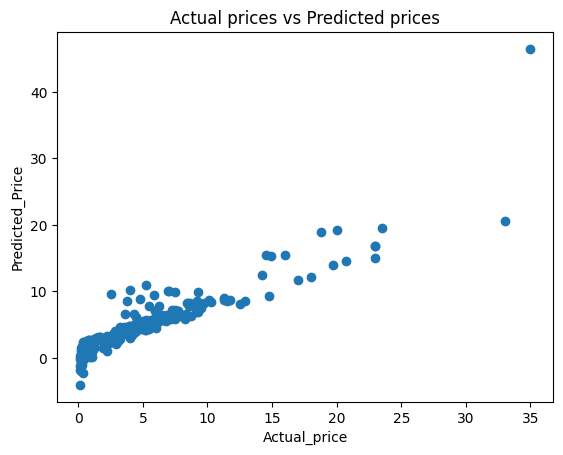

In [26]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual_price")
plt.ylabel("Predicted_Price")
plt.title("Actual prices vs Predicted prices")
plt.show()

In [27]:
# prediction of test data
test_data_prediction = lass_reg_model.predict(x_test)

In [28]:
# R squared error

error_score = metrics.r2_score(y_test,test_data_prediction)
print("R-Squared error: ", error_score)


R-Squared error:  0.8709167941173195


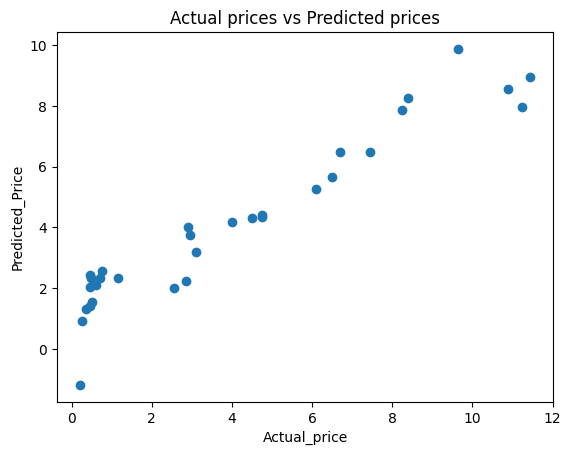

In [29]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual_price")
plt.ylabel("Predicted_Price")
plt.title("Actual prices vs Predicted prices")
plt.show()

In [30]:
import pickle

In [33]:
data = {"model":lass_reg_model}
with open('car_model_steps.pkl','wb') as file:
    pickle.dump(data,file)